In [2]:
import yfinance as yf
from grab import Grab

In [3]:
msft = yf.Ticker("MSFT")

In [16]:
hist = msft.history(start="2022-01-01", end="2022-11-04")

In [18]:
hist[["Open", "High", "Low", "Close"]]

,Open,High,Low,Close
Date,,,,
2022-01-03,333.173168,335.805960,327.639317,332.577057
2022-01-04,332.656558,333.024181,324.003104,326.874359
2022-01-05,323.744769,323.953427,313.928927,314.326324
2022-01-06,311.117257,316.631249,309.468029,311.842529
2022-01-07,312.110767,314.445518,308.077124,312.001495
...,...,...,...,...
2022-10-28,226.240005,236.600006,226.050003,235.869995
2022-10-31,233.759995,234.919998,231.149994,232.130005
2022-11-01,234.600006,235.740005,227.330002,228.169998


In [12]:
i = 0
for index, row in hist.iterrows():
    if i > 5:
        break
    i += 1
    print(f"{index}: {row.name}")

1986-03-13 00:00:00: 1986-03-13 00:00:00
1986-03-14 00:00:00: 1986-03-14 00:00:00
1986-03-17 00:00:00: 1986-03-17 00:00:00
1986-03-18 00:00:00: 1986-03-18 00:00:00
1986-03-19 00:00:00: 1986-03-19 00:00:00
1986-03-20 00:00:00: 1986-03-20 00:00:00


In [15]:
hist.loc[hist.index[0]]

Open            5.553562e-02
High            6.370269e-02
Low             5.553562e-02
Close           6.097992e-02
Volume          1.031789e+09
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 1986-03-13 00:00:00, dtype: float64

In [24]:
hist.index[50]

Timestamp('1986-05-23 00:00:00')

In [36]:
import numpy as np
import pandas as pd
# np.array([hist.index[50]], dtype='datetime64')
# np.array([hist.index[50]])
# a = np.empty((3,2), dtype='datetime64')
# a[0,0] = hist.index[50]
# a
ts = hist.index[50].timestamp()
ts


517190400.0

In [64]:
rows, cols = (5, 5)
arr2 = [[0 for i in range(cols)] for j in range(rows)]
arr2[4][2] = 2
arr2

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 2, 0, 0]]

In [63]:
T = [[11, 12, 5, 2], [15, 6,10], [10, 8, 12, 5], [12,15,8,6]]

T[2] = [11,9]
T[0][3] = 77777
T

[[11, 12, 5, 77777], [15, 6, 10], [11, 9], [12, 15, 8, 6]]

In [70]:
hist.loc[hist.index >= hist.index[50]]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-05-23,0.067514,0.068603,0.067514,0.067514,4089600,0.0,0.0
1986-05-27,0.067514,0.069691,0.067514,0.069691,13881600,0.0,0.0
1986-05-28,0.069691,0.071869,0.069691,0.071869,15523200,0.0,0.0
1986-05-29,0.071869,0.074592,0.071325,0.073503,45676800,0.0,0.0
1986-05-30,0.074047,0.077314,0.074047,0.076225,27072000,0.0,0.0
...,...,...,...,...,...,...,...
2022-10-28,226.240005,236.600006,226.050003,235.869995,40647700,0.0,0.0
2022-10-31,233.759995,234.919998,231.149994,232.130005,28357300,0.0,0.0
2022-11-01,234.600006,235.740005,227.330002,228.169998,30592300,0.0,0.0


In [63]:
hist[["Open", "High", "Low", "Close"]]

,Open,High,Low,Close
Date,,,,
1986-03-13,0.055536,0.063703,0.055536,0.060980
1986-03-14,0.060980,0.064247,0.060980,0.063158
1986-03-17,0.063158,0.064792,0.063158,0.064247
1986-03-18,0.064247,0.064792,0.062069,0.062613
1986-03-19,0.062613,0.063158,0.060980,0.061524
...,...,...,...,...
2022-10-28,226.240005,236.600006,226.050003,235.869995
2022-10-31,233.759995,234.919998,231.149994,232.130005
2022-11-01,234.600006,235.740005,227.330002,228.169998


In [46]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import plotly.graph_objects as go


class Grab:
    def __init__(self, N_near, N_far, use_close = False):
        # use_close is flag for improving the original exit procedure,
        # if use_close is true, we exit holding/shorted positions with close price instead
        self.N_near = N_near
        self.N_far = N_far
        self.use_close = use_close


    # feed is a dataframe of daily OHLC data
    def trade(self, feed):
        trend = 0
        shares = 0  # number of shares holding
        cash = 10  # cash balance. Start with 0 cash

        far_support = None
        far_resistance = None
        near_support = None
        near_resistance = None

        feed.loc[feed.index, "Trend"] = 0
        feed.loc[feed.index, "Near support"] = None
        feed.loc[feed.index, "Near resistance"] = None
        feed.loc[feed.index, "Far support"] = None
        feed.loc[feed.index, "Far resistance"] = None
        feed.loc[feed.index, "Shares"] = 0
        feed.loc[feed.index, "Price"] = None
        feed.loc[feed.index, "Cash"] = None

        dates = []

        for window in feed.rolling(window=self.N_far):
            market = window.iloc[-1]
            ts = market.name  # timestamp of the current market
            close = market["Close"]
            high = market["High"]
            low = market["Low"]
            price = None
            # if ts == pd.Timestamp('2022-10-13'):
            #     print("Pause")
            if len(window) < self.N_far:
                # feed.loc[ts, "Cash"] = cash
                continue

            if far_support is None:
                near = window.tail(self.N_near)
                far_support = window["Low"].min()
                far_resistance = window["High"].max()
                near_support = near["Low"].min()
                near_resistance = near["High"].max()
                continue

            feed.at[ts, "Far support"] = far_support
            feed.at[ts, "Far resistance"] = far_resistance
            feed.at[ts, "Near support"] = near_support
            feed.at[ts, "Near resistance"] = near_resistance

            # decide trend
            prev_trend = trend
            if close > far_resistance:
                trend = 1
            elif close < far_support:
                trend = -1

            # if trend is not triggered yet, continue to next day
            # until trend is triggered (i.e. not equal to 0)
            if trend == 0:
                continue

            # if trend is up
            if trend == 1:
                # if trend is switched, then exit any existing short positions
                # by buying back shorted position at near support level.
                # we are assuming we can always execute the trade at
                # the near support level.
                if prev_trend != trend and shares != 0:
                    # record the profit and loss for the exit trade
                    # note that this may not be executed in real trading environment
                    # when trend is reversed, the buy back at near_resistance is far
                    # below the spot price because spot is above the far resistance
                    # level.
                    # print(
                    #     f"{ts}:{prev_trend}:{trend}: Exit buying back {shares} share at ${near_support}")
                    price = close if self.use_close else near_resistance
                    cash = cash + shares * price
                    shares = 0  # exit all positons

                # if trend is not switched
                # and if the close price breaks the near support
                # and we are not holding any share, then buy one share
                # at the near support level (assuming trades can always be executed)
                elif close <= near_support and shares == 0:
                    # print(
                    #     f"{ts}:{prev_trend}:{trend}: Buying 1 share at ${near_support}")
                    price = near_support
                    shares = 1
                    cash = cash - shares * price
                # if trend is not switched
                # and if close price breaks the near resistance
                # and we are holding a share, then sell the holding shares
                # at the near resistance level
                elif close >= near_resistance and shares != 0:
                    # print(
                    #     f"{ts}:{prev_trend}:{trend}: Selling 1 share at ${near_resistance}")
                    price = near_resistance
                    cash = cash + shares * price
                    shares = 0
            elif trend == -1:
                # if trend is switched, then exit any existing long positions
                # by selling any holding position at near resistence level.
                # we are assuming we can always execute the trade at
                # the near support level.
                if prev_trend != trend and shares != 0:
                    # record the profit and loss for the exit trade
                    # note that this may not be executed in real trading environment
                    # when trend is reversed, the selling at near_support
                    # level is far above the spot price because spot is below
                    # the far support level.
                    # print(
                    #     f"{ts}:{prev_trend}:{trend}: Exit selling {shares} share at ${near_resistance}")
                    price = close if self.use_close else near_support
                    cash = cash + shares * price
                    shares = 0
                # if trend is not switched
                # and if close price breaks the near resistance
                # and we are not holding any share, then short sell a share
                # at the near resistance level
                elif close <= near_resistance and shares == 0:
                    # print(
                    #     f"{ts}:{prev_trend}:{trend}: Shorting 1 share at ${near_resistance}")
                    price = near_resistance
                    shares = -1
                    cash = cash - shares * price
                # if trend is not switched
                # and if the close price breaks the near support
                # and we have short sell a share, then buy one share
                # at the near support level (assuming trades can always be executed)
                elif close >= near_support and shares == 0:
                    # print(
                    #     f"{ts}:{prev_trend}:{trend}: Buying 1 share at ${near_support}")
                    price = near_support
                    cash = cash + shares * price
                    shares = 0

            feed.at[ts, "Price"] = price
            feed.at[ts, "Cash"] = cash
            feed.at[ts, "Trend"] = trend
            feed.at[ts, "Shares"] = shares

            # print(f"Time: {ts}, {trend}, shares:{shares}, cash:{cash}")

            near = window.tail(self.N_near)
            far_support = window["Low"].min()
            far_resistance = window["High"].max()
            near_support = near["Low"].min()
            near_resistance = near["High"].max()

        # if we are still holding or shorting any share, exit them all at close price
        if shares != 0:
            cash = cash + shares * close
            feed.at[ts, "Price"] = close
            feed.at[ts, "Cash"] = cash
            feed.at[ts, "Trend"] = trend
            feed.at[ts, "Shares"] = 0

        return feed

    def plot(self, trade_hist):
        mpf.plot(trade_hist, type='candle')
        plt.plot(trade_hist["Near support"], label="Near support")
        plt.plot(trade_hist["Near resistance"], label="Near resistance")
        plt.plot(trade_hist["Far support"], label="Far support")
        plt.plot(trade_hist["Far resistance"], label="Far resistance")
        # plt.plot(trade_hist["Shares"], label="Shares")
        plt.legend()
        plt.show()
        plt.plot(trade_hist["Cash"] + trade_hist["Shares"] * trade_hist["Close"], label="Cash")
        plt.show()

    def plot2(self, trade_hist):
        fig = go.Figure(data=[go.Candlestick(x=trade_hist.index,
                                             open=trade_hist['Open'],
                                             high=trade_hist['High'],
                                             low=trade_hist['Low'],
                                             close=trade_hist['Close'], name="Candlestick")])
        fig.add_trace(go.Line(x=trade_hist.index,
                      y=trade_hist["Near support"], name="Near support"))
        fig.add_trace(go.Line(x=trade_hist.index,
                      y=trade_hist["Near resistance"], name="Near resistance"))
        fig.add_trace(go.Line(x=trade_hist.index,
                      y=trade_hist["Far support"], name="Far support"))
        fig.add_trace(go.Line(x=trade_hist.index,
                      y=trade_hist["Far resistance"], name="Far resistance"))
        # fig.add_line(x=trade_hist.index, y=trade_hist["Near support"])
        fig.show()

/Users/lyf/opt/miniconda3/envs/ftx/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




/Users/lyf/opt/miniconda3/envs/ftx/lib/python3.9/site-packages/mplfinance/_arg_validators.py:36: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




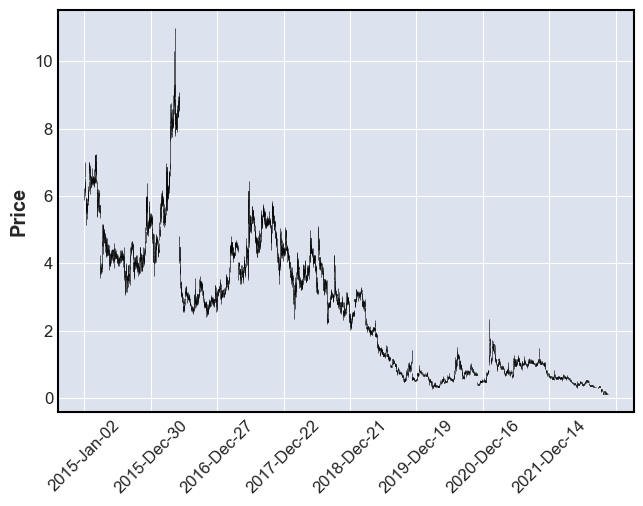

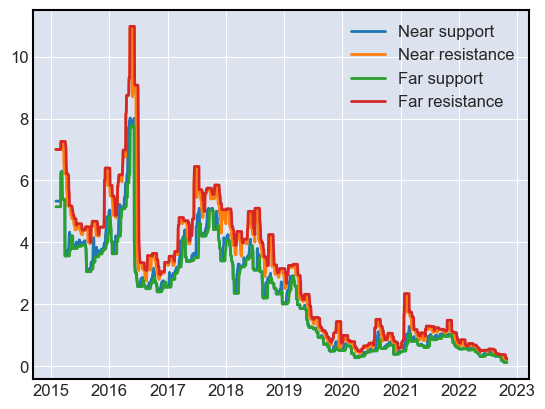

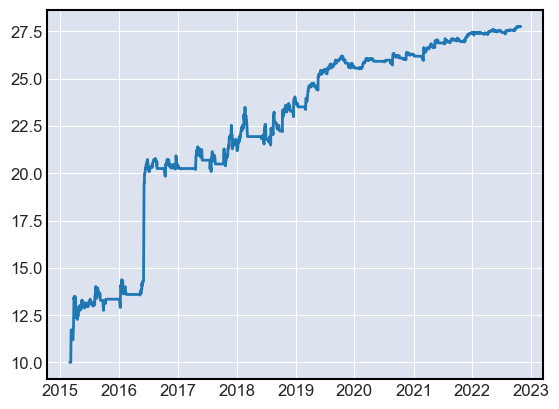

In [47]:
msft = yf.Ticker("ADMP")
hist = msft.history(start="2015-01-01", end="2022-10-28")
hist = hist[["Open", "High", "Low", "Close"]]
algo = Grab(10, 20)
trade_hist = algo.trade(hist)

trade_hist.to_csv("trade.csv")
algo.plot2(trade_hist)
algo.plot(trade_hist)

/Users/lyf/opt/miniconda3/envs/ftx/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




/Users/lyf/opt/miniconda3/envs/ftx/lib/python3.9/site-packages/mplfinance/_arg_validators.py:36: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




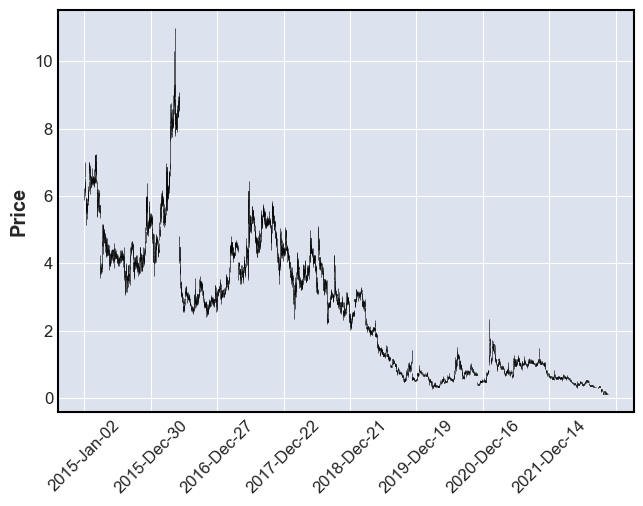

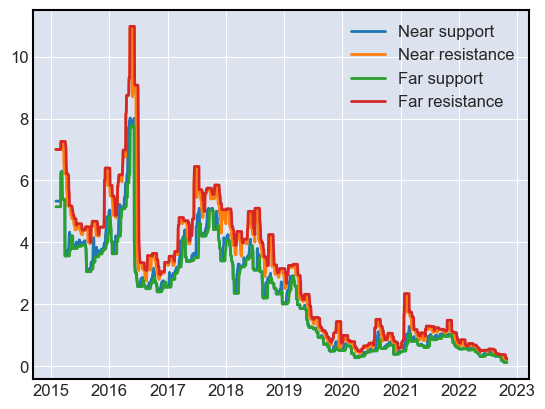

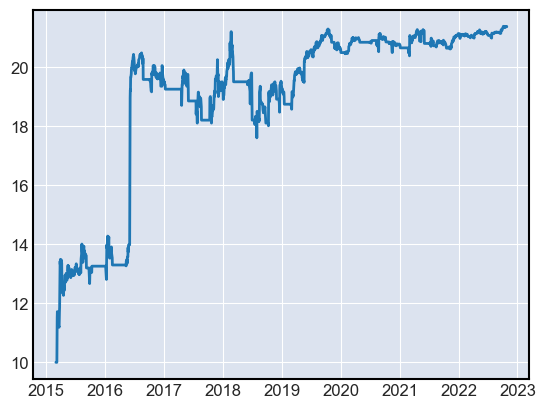

In [48]:
algo = Grab(10, 20, True)
trade_hist = algo.trade(hist)

trade_hist.to_csv("trade.csv")
algo.plot2(trade_hist)
algo.plot(trade_hist)

In [58]:
n = len(trade_hist)
print(n)
trade_hist.iloc[0]["Open"]

1970


6.150000095367432

In [59]:
trade_hist.tail()

,Open,High,Low,Close,Trend,Near support,Near resistance,Far support,Far resistance,Shares,Price,Cash
Date,,,,,,,,,,,,
2022-10-21,0.15,0.16,0.14,0.15,-1.0,0.12,0.22,0.12,0.27,-1.0,NaN,21.519999
2022-10-24,0.15,0.15,0.13,0.13,-1.0,0.12,0.22,0.12,0.27,-1.0,NaN,21.519999
2022-10-25,0.14,0.14,0.14,0.14,-1.0,0.12,0.22,0.12,0.27,-1.0,NaN,21.519999
2022-10-26,0.14,0.14,0.14,0.14,-1.0,0.13,0.22,0.12,0.26,-1.0,NaN,21.519999
2022-10-27,0.14,0.15,0.14,0.14,-1.0,0.13,0.19,0.12,0.23,0.0,0.14,21.379999


In [4]:
from collections import defaultdict
bt = defaultdict(lambda: {"ts": None, "shares": 0, "cash": -100000})

In [5]:
bt[(1,2)]

{'ts': None, 'shares': 0, 'cash': -100000}